<a href="https://colab.research.google.com/github/GGrinspun/ML_pratica_3/blob/main/GABRIEL_SALLES_GRINSPUN_Pr%C3%A1tica_03_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 03 - Clustering

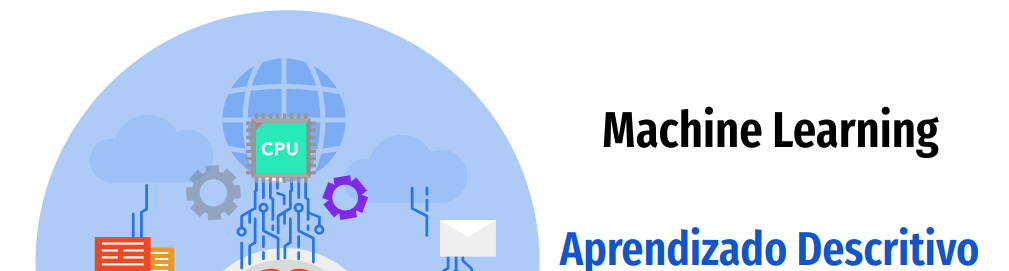

**Pessoa estudante**: Gabriel Grinspun (gsg@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um técnica de clusterização baseada no K-means para o dataset Iris. Além disso, vamos avaliar baseado em métricas de clusterização.
```

**Instruções para a prática.**

1. Importar o dataset da célula descrita neste notebook.

2. Seuir as instruções detalhadas abaixo (9 etapas).

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅



![img](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

O conjunto de dados flor Iris, também conhecido como conjunto de dados Iris ou conjunto de dados Iris de Fisher, é um conjunto de dados frequentemente usado em aprendizado de máquina e estatística como exemplo para técnicas de classificação, clusterização e visualização de dados. Este conjunto de dados foi introduzido pela primeira vez pelo estatístico e biólogo britânico Sir Ronald Fisher em 1936 em seu artigo "The Use of Multiple Measurements in Taxonomic Problems" como um exemplo de análise discriminante linear.

O conjunto de dados consiste em amostras de três espécies diferentes de flores Iris:
- Iris setosa
- Iris virginica
- Iris versicolor.

Para cada amostra, são fornecidas quatro características: o comprimento e a largura das sépalas (parte externa da flor) e o comprimento e a largura das pétalas (parte interna da flor). Essas características foram medidas em centímetros.

Aqui está uma descrição mais detalhada das características:

- Comprimento da Sépala (em centímetros)
- Largura da Sépala (em centímetros)
- Comprimento da Pétala (em centímetros)
- Largura da Pétala (em centímetros)
- Espécie da flor Iris (Iris setosa, Iris virginica ou Iris versicolor)

Este conjunto de dados é amplamente disponível e é considerado um padrão na comunidade de aprendizado de máquina para testar e validar algoritmos e técnicas. Ele também é frequentemente usado em tutoriais e cursos introdutórios de aprendizado de máquina devido à sua simplicidade e clareza

Nesta base, vamos tentar agrupar as flores por informações do tamanho de suas pétalas

1. Carregue a base e visualize algumas informações sobre a mesma [**5 Pontos**]
- head, info, describe

2. Selecione apenas as características relacionadas às pétalas [**5 Pontos**]
- 'petal length (cm)', 'petal width (cm)'

3. Plote a dispersão dessas características [**5 Pontos**]
- plt.scatter

4. Padronize os dados (não é recomendado utilizar técnicas não-lineares) [**15 Pontos**]
- Avalie qual método utilizar de acordo com as técnicas vistas
- Plote novamente a dispersão

5. Crie e treine modelos KMeans com valores de k que achar válido (de acordo com a visualização) [**15 Pontos**]

6. Plote a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos [**10 Pontos**]
- `kmeans.labels_` pode ser utilizado como cores

7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia
kmeans.inertia_ [**15 Pontos**]

8. Analise o melhor valor de K utilizando o Silhouette Score
silhouette_score [**15 Pontos**]

9. Baseando-se no melhor k encontrado: [**15 Pontos**]
- compare o resultado obtido com as espécies reais visualmente
- descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
- qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

## Parte 1 - Importação do Dataset

**Pontuação: Sem pontuação nesta etapa.**

Seguir a célula abaixo!

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [ ]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## Parte 2 - EDA

###1. Carregue a base e visualize algumas informações sobre a mesma [**5 Pontos**]
- head, info, describe


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


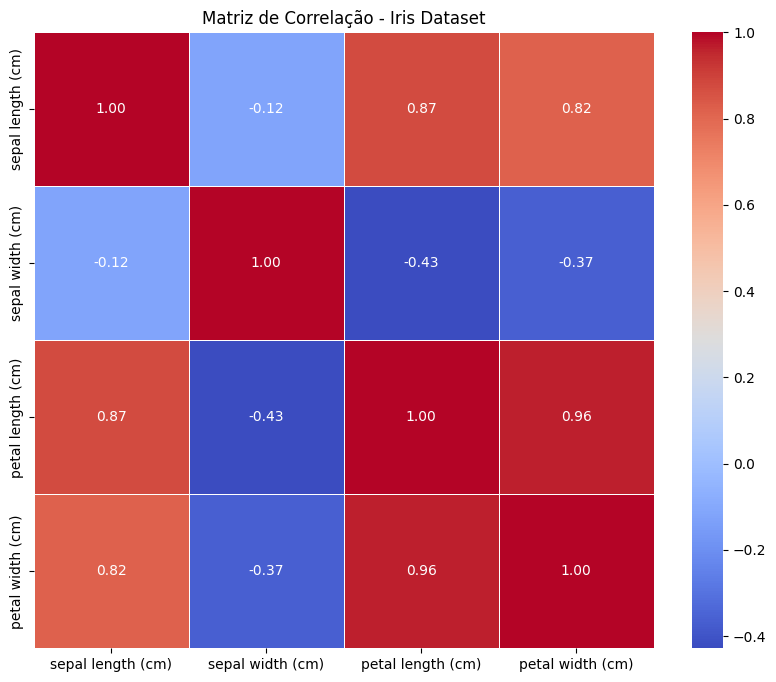

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = iris_df .corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Iris Dataset')
plt.show()

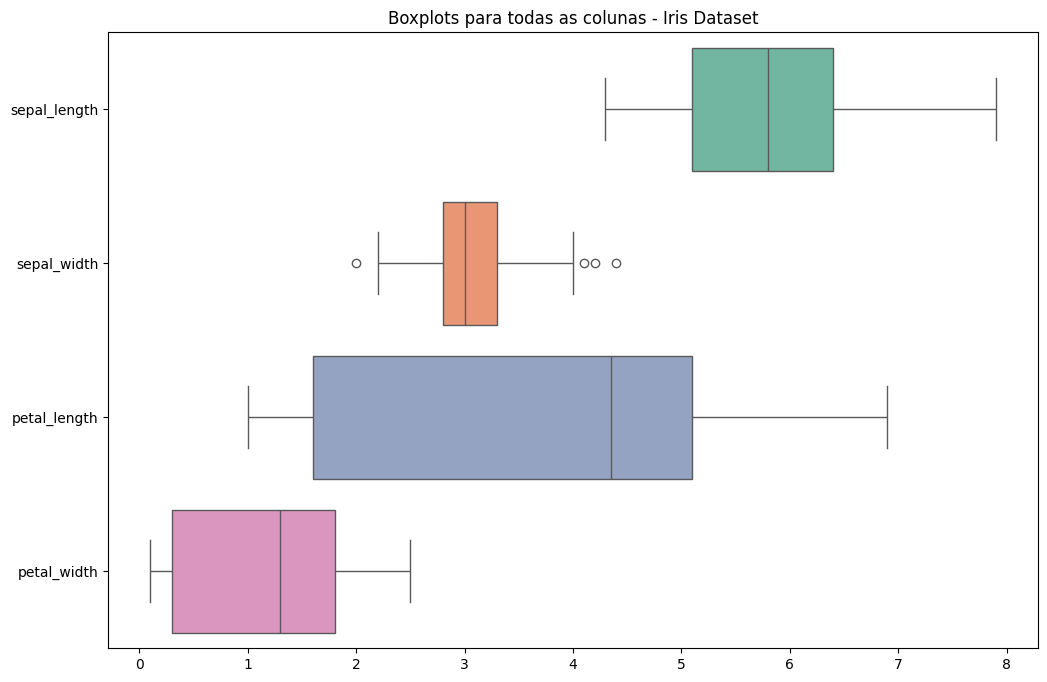

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Iris
iris = sns.load_dataset("iris")

# Criar boxplots para todas as colunas
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris, orient="h", palette="Set2")
plt.title('Boxplots para todas as colunas - Iris Dataset')
plt.show()

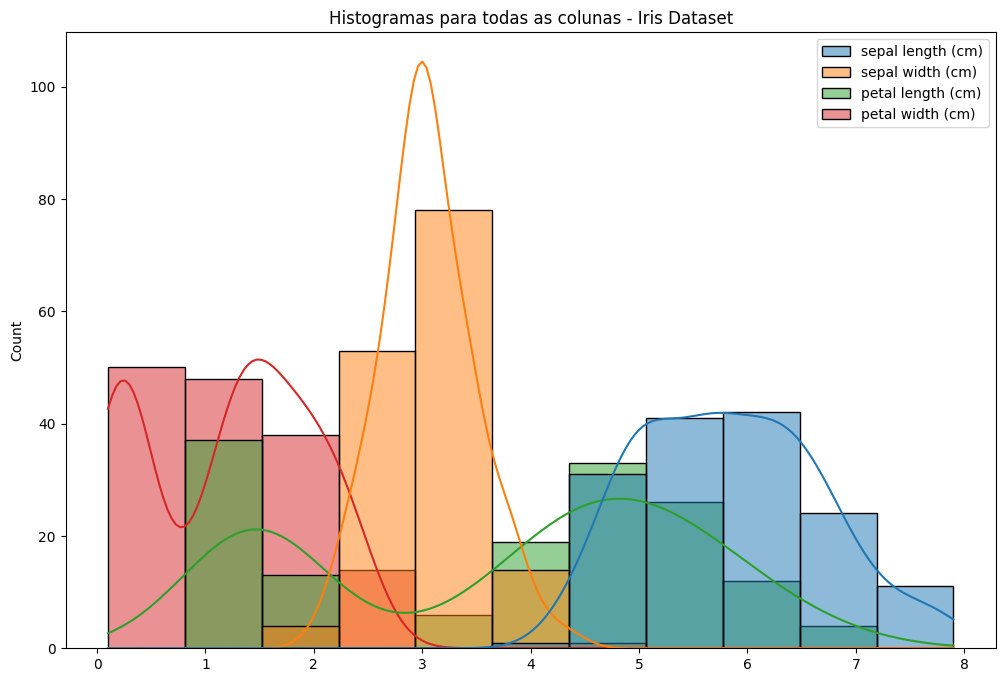

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados Iris


# Criar histogramas para todas as colunas
plt.figure(figsize=(12, 8))
sns.histplot(data=iris_df, kde=True)
plt.title('Histogramas para todas as colunas - Iris Dataset')
plt.show()

<Figure size 1200x800 with 0 Axes>

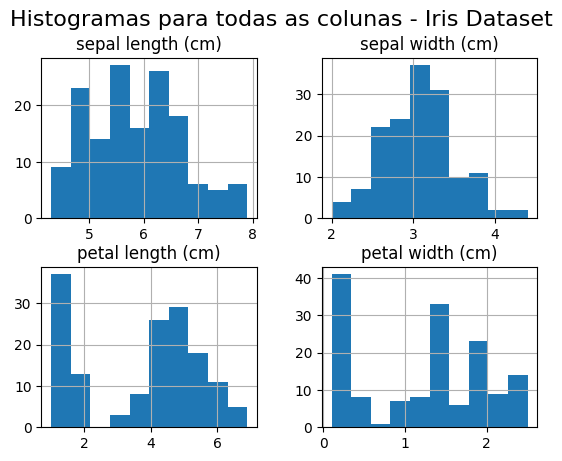

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o conjunto de dados Iris

# Criar histogramas para todas as colunas
plt.figure(figsize=(12, 8))
iris_df.hist()
plt.suptitle('Histogramas para todas as colunas - Iris Dataset', fontsize=16)
plt.show()


**O atributo 'Sepal Width' parece estar em uma distribuição normal, vamos investigar mais a fundo**

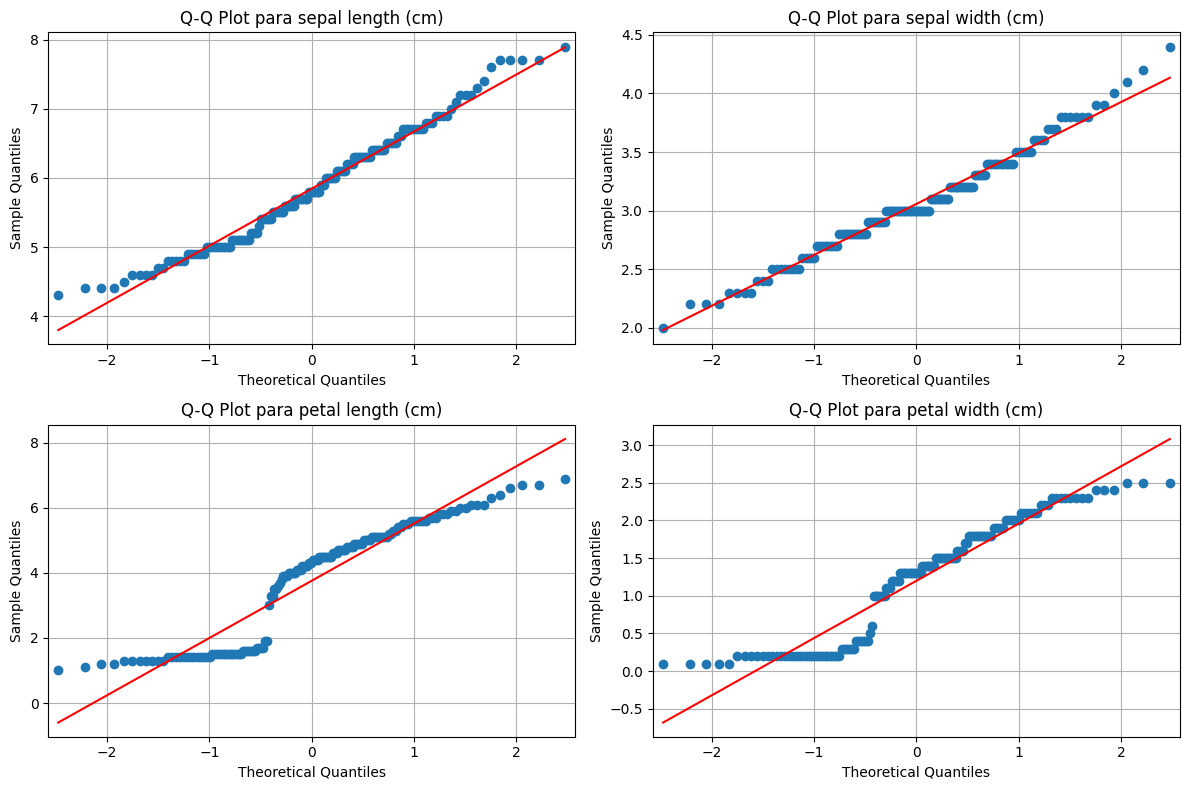

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(iris_df.columns[:]):  # Itera sobre todas as colunas exceto a última (que é a coluna de espécies)
    ax = axes[i // 2, i % 2]
    sm.qqplot(iris_df[col], line='s', ax=ax)
    ax.set_title(f'Q-Q Plot para {col}')
    ax.grid(True)

plt.tight_layout()
plt.show()


**Este código criou uma grade de Q-Q plots para cada coluna numérica no Data Frame Iris. Cada Q-Q plot compara os quantis da distribuição dos dados com os quantis de uma distribuição normal teórica.**

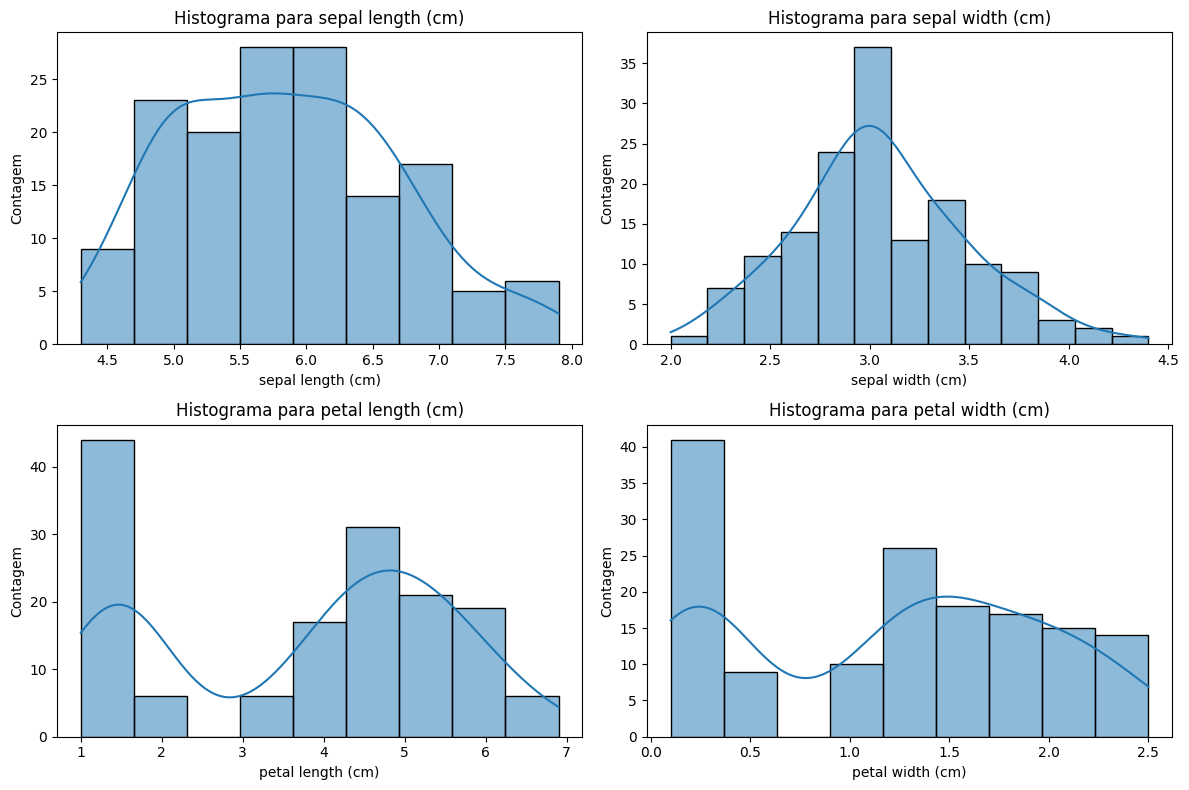

In [ ]:
# Criar histogramas para todas as colunas
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris_df.columns[:]):  # Itera sobre todas as colunas exceto a última (que é a coluna de espécies)
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_df[col], kde=True)
    plt.title(f'Histograma para {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

for col in iris_df.columns[:]:
    stat, p_value = shapiro(iris_df[col])
    print(f'Teste de Shapiro-Wilk para {col}: Estatística = {stat}, Valor-p = {p_value}')

Teste de Shapiro-Wilk para sepal length (cm): Estatística = 0.9760899543762207, Valor-p = 0.01018026564270258
Teste de Shapiro-Wilk para sepal width (cm): Estatística = 0.9849168062210083, Valor-p = 0.10112646222114563
Teste de Shapiro-Wilk para petal length (cm): Estatística = 0.8762685656547546, Valor-p = 7.412652158755861e-10
Teste de Shapiro-Wilk para petal width (cm): Estatística = 0.9018340706825256, Valor-p = 1.680264105630158e-08


**O tamanho desse data set pode estar interferindo nas respostas do meu p-value e na analise porem atraves dos histogramas, e q-q plots podemos ver que é possivel que algumas variaveis estejam distribuidas normalmente**

###2. Selecione apenas as características relacionadas às pétalas [**5 Pontos**]
- 'petal length (cm)', 'petal width (cm)'


In [ ]:
Petals_df = iris_df[['petal length (cm)', 'petal width (cm)']]

Petals_df.head(5)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


###3. Plote a dispersão dessas características [**5 Pontos**]
- plt.scatter

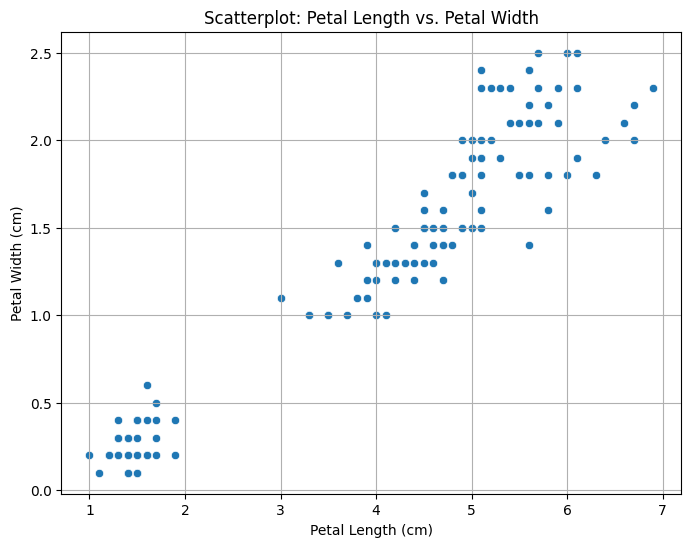

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Petals_df, x='petal length (cm)', y='petal width (cm)')
plt.title('Scatterplot: Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

**Podemos percebre que há uma clara divisão nesses dados onde uma parte se concentra no eixo inferior esquerdo e outra domina o canto superior direito com comprimento a partir dos 3cm**

###4. Padronize os dados (não é recomendado utilizar técnicas não-lineares) [**15 Pontos**]
- dispersão após o escalonamento
- Avaliar qual método utilizar de acordo com as técnicas vistas


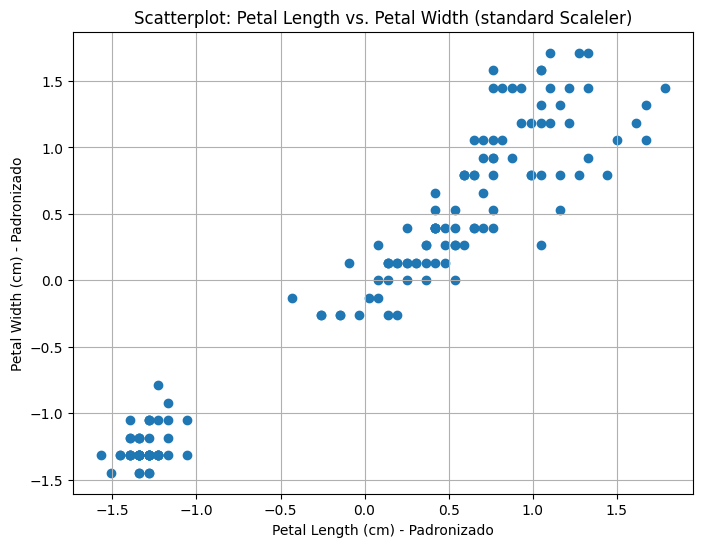

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Padronizar os dados
Petals_scaled = scaler.fit_transform(Petals_df)

# Converter o array padronizado de volta para um DataFrame
Petals_scaled_df = pd.DataFrame(Petals_scaled, columns=['petal length (cm)', 'petal width (cm)'])

plt.figure(figsize=(8, 6))
plt.scatter(Petals_scaled_df['petal length (cm)'], Petals_scaled_df['petal width (cm)'])
plt.title('Scatterplot: Petal Length vs. Petal Width (standard Scaleler)')
plt.xlabel('Petal Length (cm) - Padronizado')
plt.ylabel('Petal Width (cm) - Padronizado')
plt.grid(True)
plt.show()

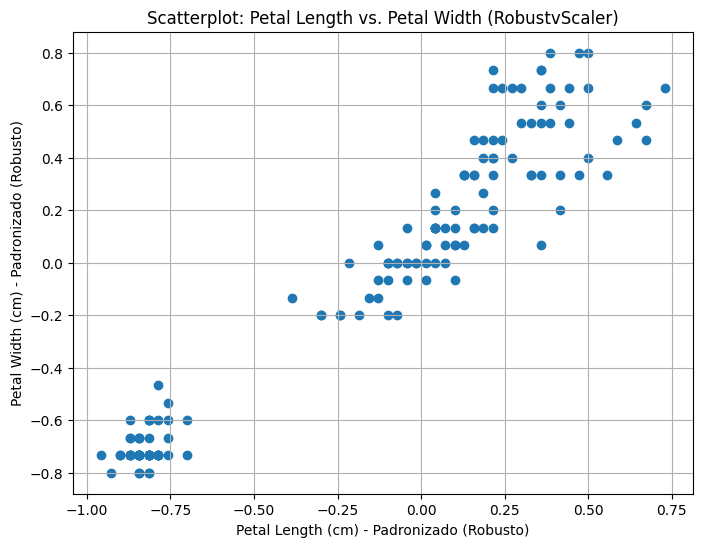

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Padronizar os dados
Petals_scaled = scaler.fit_transform(Petals_df)

# Converter o array padronizado de volta para um DataFrame
Petals_scaled_df = pd.DataFrame(Petals_scaled, columns=['petal length (cm)', 'petal width (cm)'])
plt.figure(figsize=(8, 6))
plt.scatter(Petals_scaled_df['petal length (cm)'], Petals_scaled_df['petal width (cm)'])
plt.title('Scatterplot: Petal Length vs. Petal Width (RobustvScaler)')
plt.xlabel('Petal Length (cm) - Padronizado (Robusto)')
plt.ylabel('Petal Width (cm) - Padronizado (Robusto)')
plt.grid(True)
plt.show()

In [ ]:
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

# Aplicar o escalonamento aos dados
Petals_standard_scaled = scaler_standard.fit_transform(Petals_df)
Petals_robust_scaled = scaler_robust.fit_transform(Petals_df)

# Converter os arrays escalonados de volta para DataFrames
Petals_standard_scaled_df = pd.DataFrame(Petals_standard_scaled, columns=['petal length (cm)', 'petal width (cm)'])
Petals_robust_scaled_df = pd.DataFrame(Petals_robust_scaled, columns=['petal length (cm)', 'petal width (cm)'])

# Calcular as variâncias e correlações para os dados escalonados por cada método
variance_standard = Petals_standard_scaled_df.var()
variance_robust = Petals_robust_scaled_df.var()


# Imprimir as variâncias e correlações
print("Variância dos dados escalonados com StandardScaler:\n", variance_standard)
print("\nVariância dos dados escalonados com RobustScaler:\n", variance_robust)


Variância dos dados escalonados com StandardScaler:
 petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

Variância dos dados escalonados com RobustScaler:
 petal length (cm)    0.254390
petal width (cm)     0.258225
dtype: float64


**Podemos perceber que o Robust scaler possui uma variancia bem menor que os metodo de escalonamento Standard, vamos usa-lo a partir de agora**

##Parte 2. Encontrando K

5. Crie e treine modelos KMeans com valores de k que achar válido (de acordo com a visualização) [**15 Pontos**]

6. Plote a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos [**10 Pontos**]
- `kmeans.labels_` pode ser utilizado como cores

7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia
kmeans.inertia_ [**15 Pontos**]

8. Analise o melhor valor de K utilizando o Silhouette Score
silhouette_score [**15 Pontos**]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


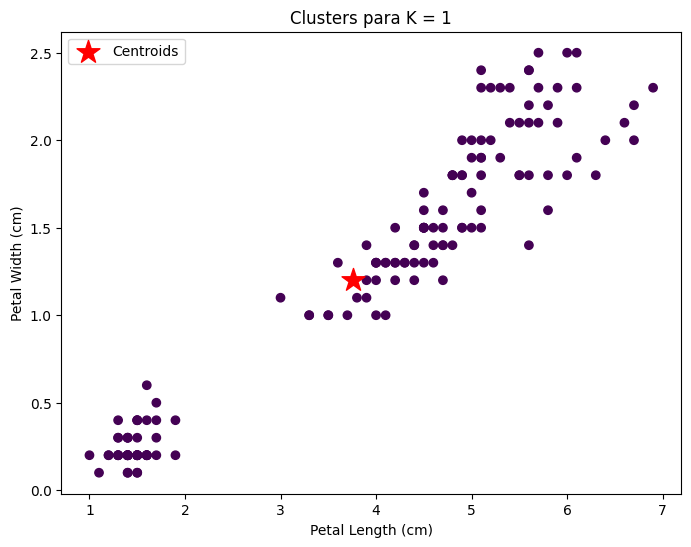

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


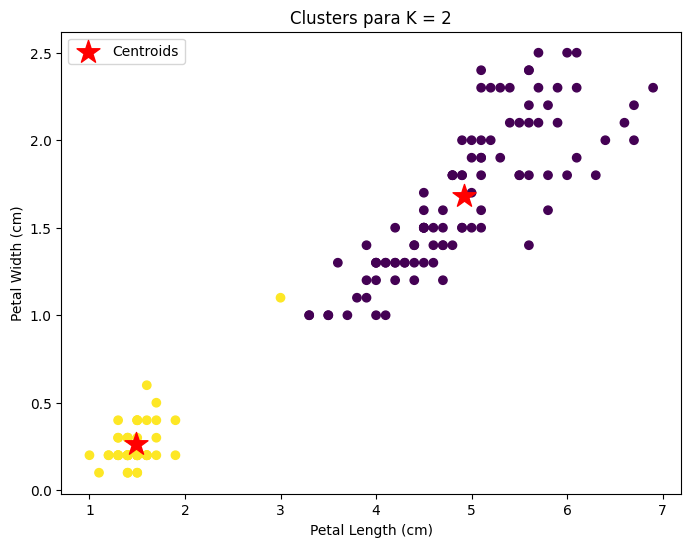

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


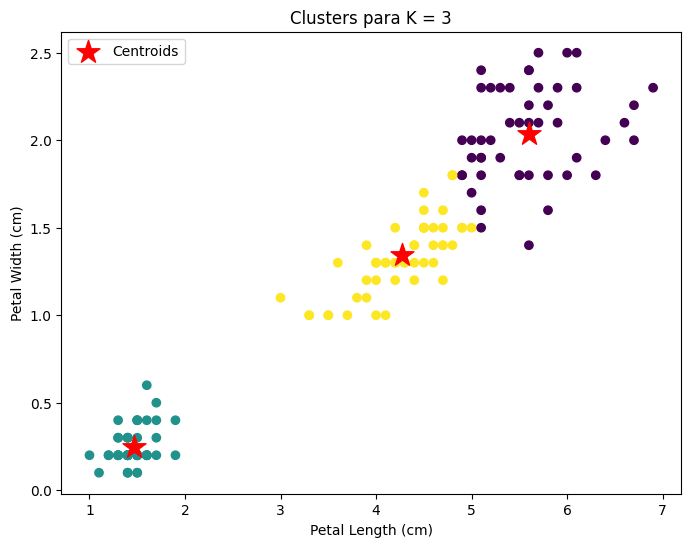

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


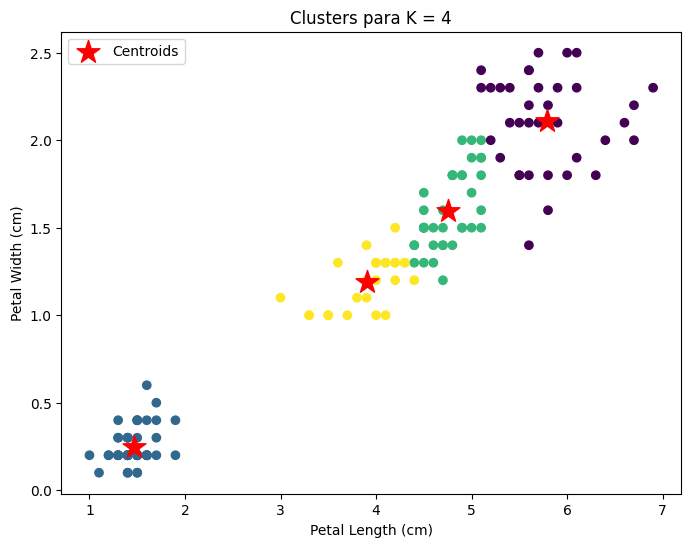

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


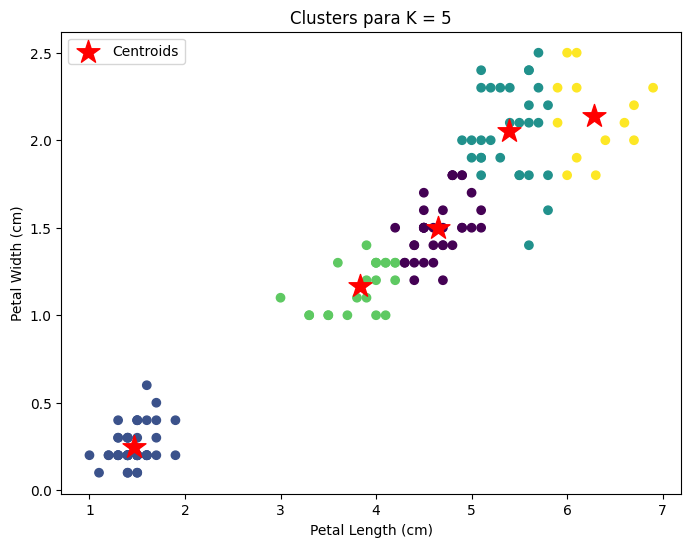

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = Petals_df
# Iterar sobre diferentes valores de K
for k in range(1, 6):
    # Criar o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar o modelo aos dados
    kmeans.fit(X)
    # Obter os rótulos dos clusters e os centróides
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Plotar os clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')
    plt.title(f'Clusters para K = {k}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

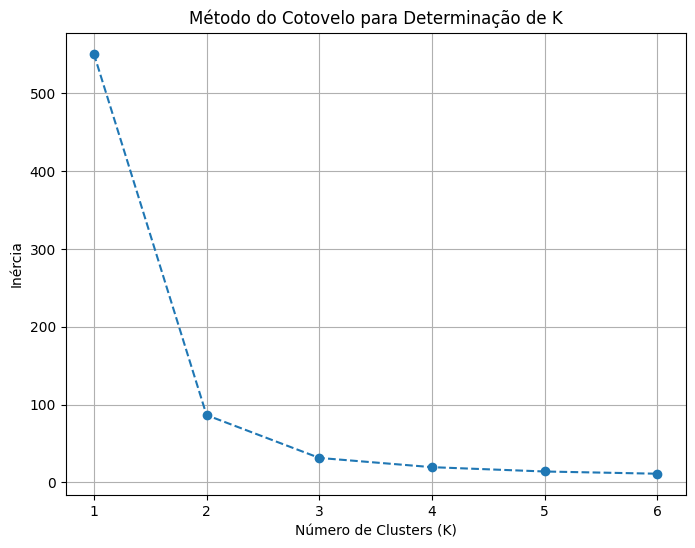

In [ ]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico da inércia em função de K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação de K')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

**O melhor valor de K pode ser 3 ou 4, vamos utilizar o metodo da silhueta para tirar a conclusão**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


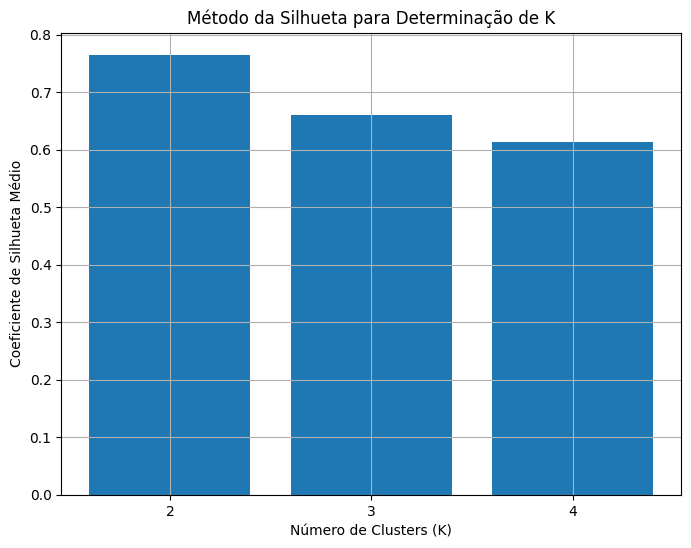

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico de barras do coeficiente de silhueta médio em função de K
plt.figure(figsize=(8, 6))
plt.bar(range(2, 5), silhouette_scores)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silhueta Médio')
plt.title('Método da Silhueta para Determinação de K')
plt.xticks(range(2, 5))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2 O coeficiente de silhueta médio é : 0.7653904101258123


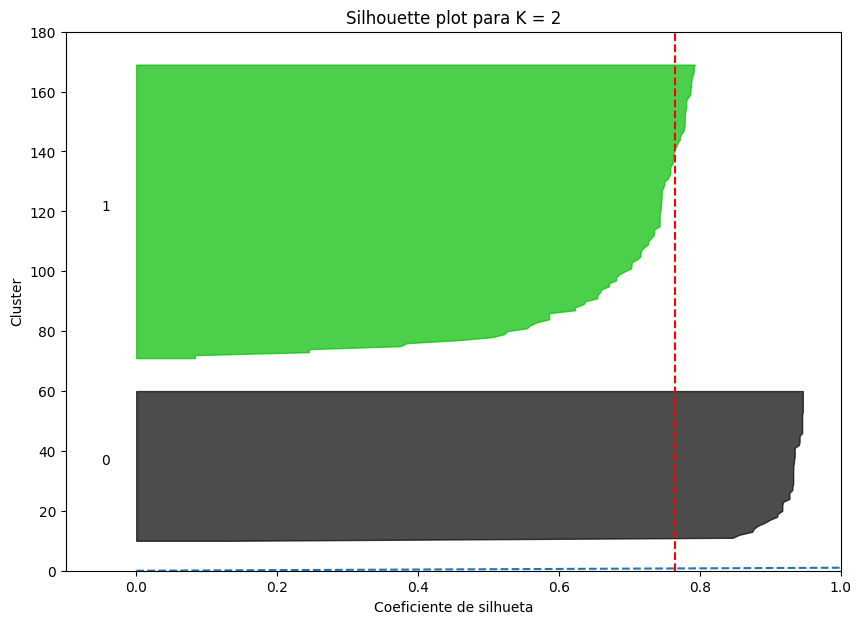

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3 O coeficiente de silhueta médio é : 0.6604800083974887


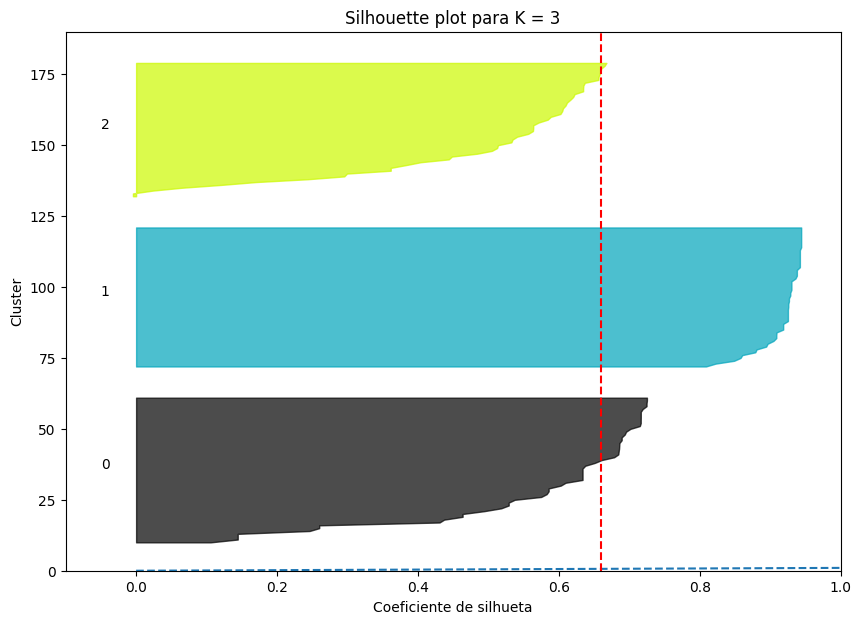

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 4 O coeficiente de silhueta médio é : 0.6127580794464402


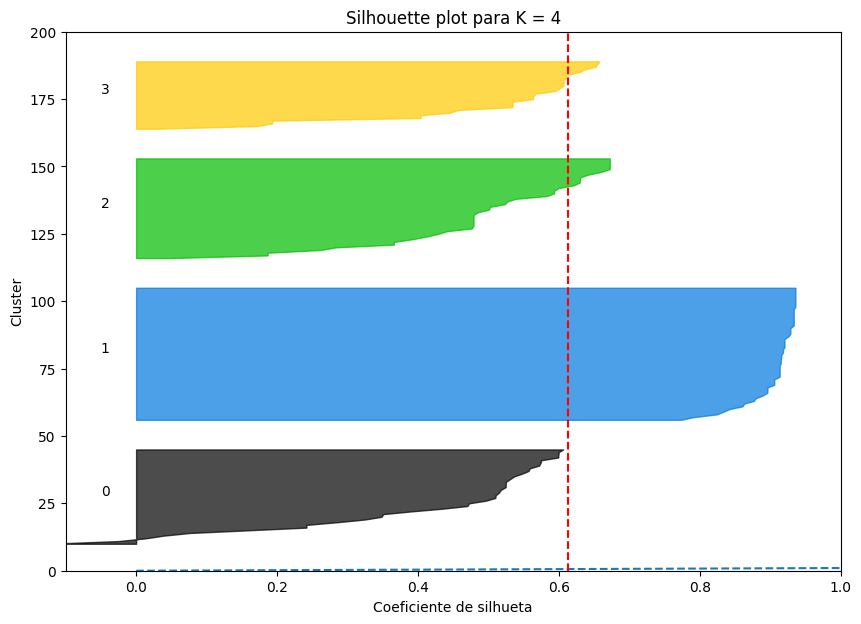

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Carregar o seu conjunto de dados
# Suponha que você já tenha carregado e preparado o conjunto de dados como 'X'
# Certifique-se de que 'X' contém as características que você deseja usar para clustering

# Defina a faixa de valores de K
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Inicialize o modelo KMeans com o número de clusters atual
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # Ajuste o modelo aos seus dados
    cluster_labels = clusterer.fit_predict(X)

    # Calcule o coeficiente de silhueta médio para os clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters, "O coeficiente de silhueta médio é :", silhouette_avg)

    # Calcule os valores do coeficiente de silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Plotagem
    plt.figure(figsize=(10, 7))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.title("Silhouette plot para K = %d" % n_clusters)
    plt.xlabel("Coeficiente de silhueta")
    plt.ylabel("Cluster")

    # A linha vertical indica o coeficiente de silhueta médio para todos os valores
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

###Vamos assumir k = 3



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


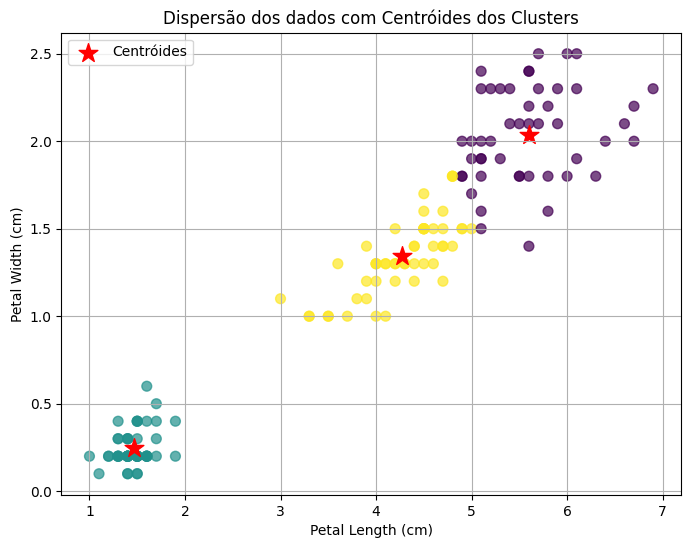

In [ ]:
# Escolher o número de clusters (K)
k = 3

# Inicializar o modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(X)

# Obter os rótulos dos clusters e os centróides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotar a dispersão dos dados e os centróides dos clusters
plt.figure(figsize=(8, 6))

# Plotar os pontos de dados
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plotar os centróides dos clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centróides')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Dispersão dos dados com Centróides dos Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Petals_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


agora, vamos criar uma nova coluna com o valor do centroide de cada cluster 1, 2 ou 3(0,1,2)

##Parte 3. Validando e analisando modelo
9. Baseando-se no melhor k encontrado: [15 Pontos]

* compare o resultado obtido com as espécies reais visualmente
* descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
* qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

In [ ]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
Petals_df['cluster'] = kmeans.fit_predict(Petals_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-142-b73b5169e8f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Petals_df['cluster'] = kmeans.fit_predict(Petals_scaled)


**comparação do resultado obtido com as espécies reais**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
# Carregue o conjunto de dados Iris
iris = datasets.load_iris()
X_iris = iris.data  # Características
y_true_iris = iris.target  # Rótulos verdadeiros do Iris

# Supondo que Petals_df contenha os dados das características 'petal length (cm)' e 'petal width (cm)'
X_petals = Petals_df[['petal length (cm)', 'petal width (cm)']]

# Aplique o algoritmo de clusterização (por exemplo, K-means) aos dados de Petals_df
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_petals = kmeans.fit_predict(X_petals)

# Calcule o ARI usando os rótulos verdadeiros do conjunto de dados Iris e os rótulos dos clusters de Petals_df
ari = adjusted_rand_score(y_true_iris, cluster_labels_petals)

print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.8856970310281228


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


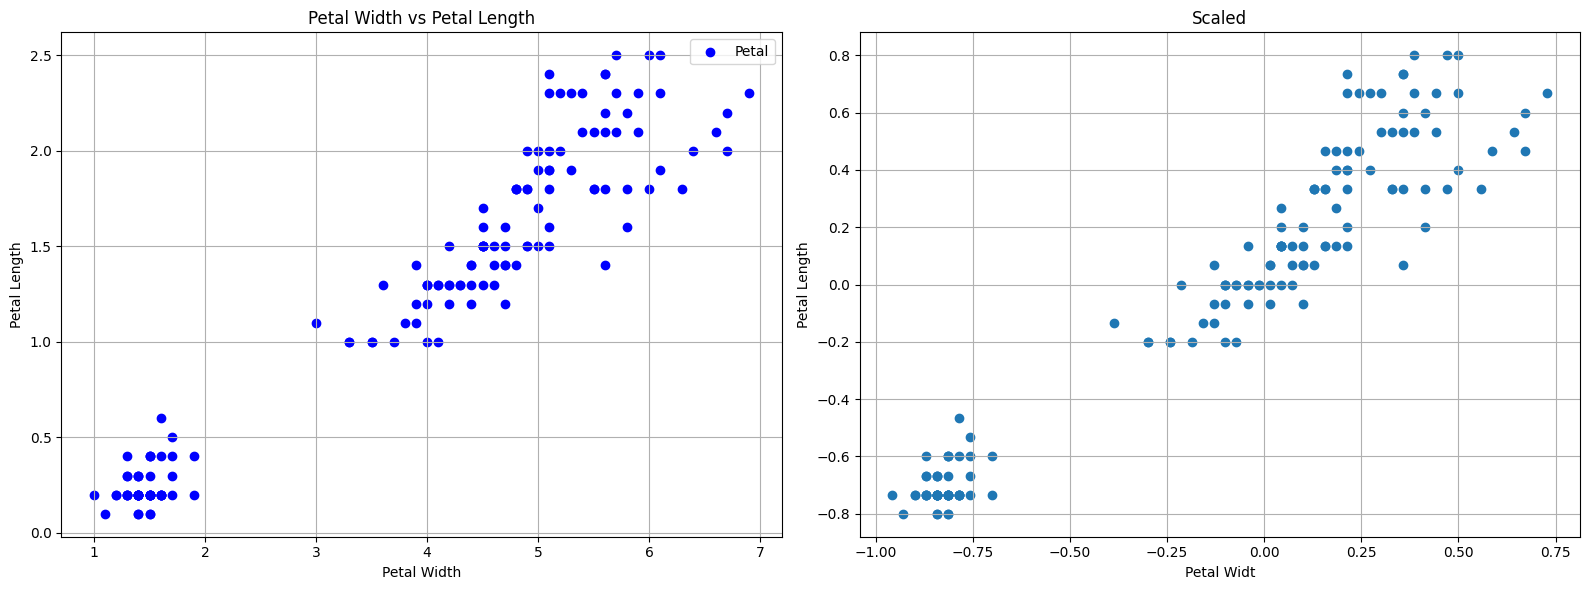

In [ ]:
# Defina o tamanho da figura
plt.figure(figsize=(16, 6))

# Primeiro subplot
plt.subplot(1, 2, 1)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c='b', marker='o', label='Petal')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width vs Petal Length')
plt.legend()
plt.grid(True)

# Segundo subplot
plt.subplot(1, 2, 2)
plt.scatter(Petals_scaled_df['petal length (cm)'], Petals_scaled_df['petal width (cm)'])
plt.title('Scaled')
plt.xlabel('Petal Widt')
plt.ylabel('Petal Length')
plt.grid(True)

# Mostra os subplots
plt.tight_layout()
plt.show()


*O Índice Rand Ajustado (ARI) é uma métrica usada para avaliar a similaridade entre dois agrupamentos(0 a 1), levando em consideração os rótulos reais dos dados. Ele mede a concordância entre os agrupamentos produzidos pelo algoritmo de clusterização e os agrupamentos reais dos dados, é uma métrica útil para avaliar a qualidade dos agrupamentos produzidos por algoritmos de clusterização quando os rótulos verdadeiros dos dados são conhecidos*

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Petals_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


**representantes dos grupos (centróides) e cada um dos clusters encontrados**

In [ ]:

# Inicializar e ajustar o modelo KMeans aos dados
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(Petals_df[['petal length (cm)', 'petal width (cm)']])
# Criar um DataFrame para armazenar os centróides
centroid_df = pd.DataFrame(centroids, columns=['petal length (cm)', 'petal width (cm)'])

# Adicionar uma coluna para os rótulos dos clusters
centroid_df['cluster'] = range(1, k+1)

# Exibir os centróides
print("Posição dos Centróides dos Clusters:")
print(centroid_df)

cluster_counts = Petals_df.groupby(labels).size()
print('\nQuantidade de instancias em cada cluster:')
# Exibir a contagem de pontos em cada cluster
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} pontos")



Posição dos Centróides dos Clusters:
   petal length (cm)  petal width (cm)  cluster
0           5.595833          2.037500        1
1           1.462000          0.246000        2
2           4.269231          1.342308        3

Quantidade de instancias em cada cluster:
Cluster 1: 48 pontos
Cluster 2: 50 pontos
Cluster 3: 52 pontos


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.**

Experimento: calcular todas as distancias dos itens para seu devido cluster e verificar se algum deles possui distancia acima de 2 graus de desvio padrão.

In [ ]:
# Calcule as distâncias de cada ponto ao centróide do seu cluster
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

# Calcule as diferenças entre os pontos e os centróides correspondentes
differences = Petals_df[['petal length (cm)', 'petal width (cm)']].values - centroids[clusters][:, :2]

# Calcule a distância euclidiana para cada ponto
distances = np.linalg.norm(differences, axis=1)

# Insira a coluna 'distance' no DataFrame Petals_df
Petals_df['distance'] = distances

# Exiba o DataFrame atualizado
print(Petals_df)

     petal length (cm)  petal width (cm)  cluster  distance
0                  1.4               0.2        1  0.077201
1                  1.4               0.2        1  0.077201
2                  1.3               0.2        1  0.168404
3                  1.5               0.2        1  0.059666
4                  1.4               0.2        1  0.077201
..                 ...               ...      ...       ...
145                5.2               2.3        0  0.474963
146                5.0               1.9        0  0.611493
147                5.2               2.0        0  0.397606
148                5.4               2.3        0  0.327501
149                5.1               1.8        0  0.549779

[150 rows x 4 columns]



Quantidade de outliers por cluster:
Cluster 0: 0 outliers
Cluster 1: 3 outliers
Cluster 2: 1 outliers


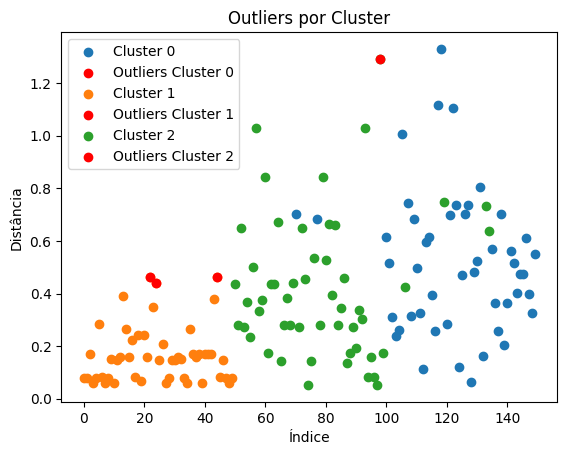

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado Petals_df com colunas 'cluster' e 'distance'

# Agrupe o DataFrame por valores únicos na coluna 'cluster'
grupos = Petals_df.groupby('cluster')
contagem_outliers_por_cluster = {}

# Calcule os limites para identificar outliers (por exemplo, usando a regra do IQR) para cada grupo
outliers = pd.DataFrame()

for nome, grupo in grupos:
    q1 = grupo['distance'].quantile(0.25)
    q3 = grupo['distance'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 2 * iqr
    limite_superior = q3 + 2 * iqr

    # Identifique os outliers dentro de cada grupo
    outliers_grupo = grupo[(grupo['distance'] < limite_inferior) | (grupo['distance'] > limite_superior)]

    # Adicione os outliers deste grupo ao DataFrame geral de outliers
    outliers = pd.concat([outliers, outliers_grupo])

    # Armazene a contagem de outliers para este cluster no dicionário
    contagem_outliers_por_cluster[nome] = outliers_grupo.shape[0]

    # Plotar os pontos do grupo
    plt.scatter(grupo.index, grupo['distance'], label=f'Cluster {nome}')
    # Plotar os outliers do grupo
    plt.scatter(outliers_grupo.index, outliers_grupo['distance'], color='red', label=f'Outliers Cluster {nome}')

# Printe a quantidade de outliers de cada cluster
print("\nQuantidade de outliers por cluster:")
for cluster, contagem in contagem_outliers_por_cluster.items():
    print(f"Cluster {cluster}: {contagem} outliers")

plt.xlabel('Índice')
plt.ylabel('Distância')
plt.title('Outliers por Cluster')
plt.legend()
plt.show()



Quantidade de outliers por cluster:
Cluster 0: 0 outliers
Cluster 1: 0 outliers
Cluster 2: 0 outliers


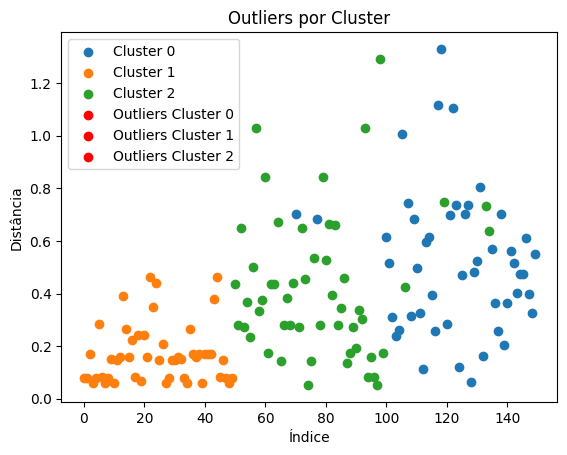

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você tenha um DataFrame chamado Petals_df com colunas 'cluster' e 'distance'

# Agrupe o DataFrame por valores únicos na coluna 'cluster'
grupos = Petals_df.groupby('cluster')
contagem_outliers_por_cluster = {}

# Plotar os pontos de cada cluster
for nome, grupo in grupos:
    plt.scatter(grupo.index, grupo['distance'], label=f'Cluster {nome}')

# Identificar e plotar os outliers de cada cluster
for nome, grupo in grupos:
    q1 = grupo['distance'].quantile(0.25)
    q3 = grupo['distance'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 3 * iqr
    limite_superior = q3 + 3 * iqr

    outliers_grupo = grupo[(grupo['distance'] < limite_inferior) | (grupo['distance'] > limite_superior)]
    plt.scatter(outliers_grupo.index, outliers_grupo['distance'], color='red', label=f'Outliers Cluster {nome}')

    contagem_outliers_por_cluster[nome] = outliers_grupo.shape[0]

# Printar a quantidade de outliers de cada cluster
print("\nQuantidade de outliers por cluster:")
for cluster, contagem in contagem_outliers_por_cluster.items():
    print(f"Cluster {cluster}: {contagem} outliers")

plt.xlabel('Índice')
plt.ylabel('Distância')
plt.title('Outliers por Cluster')
plt.legend()
plt.show()


**A partir de 3 desvios padrão não conseguimos identificar outliers, vamos tomar o valor ideal como 2 para o experimento**

**Utilizando o DBSCAN para calcular os outliers(metodo mais utilizado)**

In [ ]:
from sklearn.cluster import DBSCAN



# Selecionar os recursos que serão usados no algoritmo de agrupamento
escaneado = Petals_df[['petal length (cm)', 'petal width (cm)']]

# Defina os hiperparâmetros do algoritmo DBSCAN
epsilon = 0.5  # Raio máximo de vizinhança
min_samples = 5  # Número mínimo de pontos em uma vizinhança para definir um ponto central

# Crie o objeto DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Ajuste o modelo aos dados
dbscan.fit(X)

# Adicione os rótulos dos clusters ao DataFrame original
Petals_df['cluster_scan'] = dbscan.labels_

# Verifique quantos clusters foram identificados (-1 indica pontos considerados como ruído)
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f'Número de clusters encontrados: {num_clusters}')

# Visualize os clusters
print("Rótulos dos clusters:")
print(Petals_df['cluster_scan'].value_counts())

Número de clusters encontrados: 3
Rótulos dos clusters:
cluster_scan
 1    51
 0    50
 2    48
-1     1
Name: count, dtype: int64


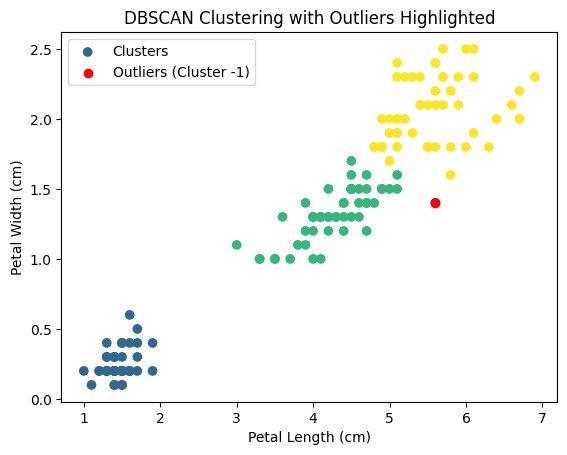

In [ ]:
import matplotlib.pyplot as plt

# Filtrar os outliers rotulados como -1
outliers = Petals_df[Petals_df['cluster_scan'] == -1]

# Plotar todos os pontos
plt.scatter(Petals_df['petal length (cm)'], Petals_df['petal width (cm)'], c=Petals_df['cluster_scan'], cmap='viridis', label='Clusters')
# Plotar outliers com rótulo -1 em vermelho
plt.scatter(outliers['petal length (cm)'], outliers['petal width (cm)'], c='red', label='Outliers (Cluster -1)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('DBSCAN Clustering with Outliers Highlighted')
plt.legend()
plt.show()


No db scan o rotulo -1 é considerado como ruido, portanto teriamos apenas **UM** outlier e em comparação com o nosso experimento de outliers se baseando no desvio padrão teriamos **QUATRO** ouliers. A minha conclusão é que esses dois metodos podem sim ser utilizados para diferentes tipos de análises(dependendo do propósito), mas eles utilizam tecnicas diferentes para fazer essa busca por ouliers (vizinhos e densidade e raio x distancia euclidiana) então podemos considerar mais como uma avaliação alternativa à uma validação "concreta"